In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
merged_df = pd.read_csv('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/csv_files/merged_daily_data.csv')
merged_df['date'] = pd.to_datetime(merged_df['date'])
print(f"✓ Loaded merged dataset: {merged_df.shape}")

✓ Loaded merged dataset: (479, 16)


# ANALYSIS 1: RISK-ADJUSTED RETURNS (SHARPE RATIO)


ANALYSIS 1: RISK-ADJUSTED RETURNS (SHARPE RATIO)
Greed: Sharpe Ratio = 0.2894
Extreme Greed: Sharpe Ratio = 0.4832
Neutral: Sharpe Ratio = 0.2832
Fear: Sharpe Ratio = 0.2414
Extreme Fear: Sharpe Ratio = 0.5178


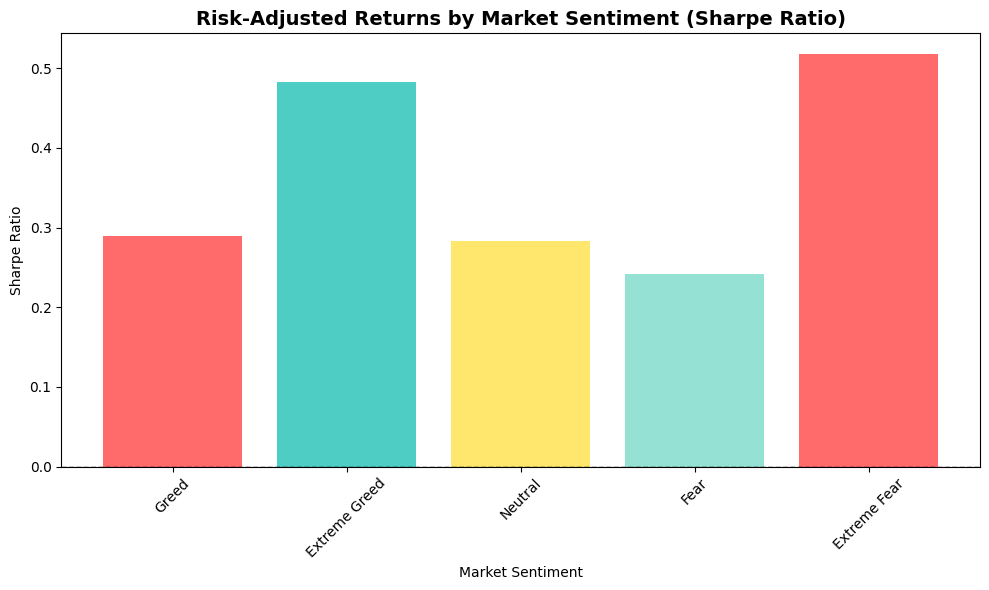

✓ Chart saved: outputs/07_sharpe_ratio.png


In [5]:
print("\n" + "=" * 80)
print("ANALYSIS 1: RISK-ADJUSTED RETURNS (SHARPE RATIO)")
print("=" * 80)

# Calculate Sharpe Ratio by sentiment
sharpe_by_sentiment = {}
for sentiment in merged_df['classification'].unique():
    subset = merged_df[merged_df['classification'] == sentiment]
    avg_return = subset['avg_pnl'].mean()
    std_return = subset['avg_pnl'].std()
    sharpe = avg_return / std_return if std_return != 0 else 0
    sharpe_by_sentiment[sentiment] = sharpe
    print(f"{sentiment}: Sharpe Ratio = {sharpe:.4f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(sharpe_by_sentiment.keys(), sharpe_by_sentiment.values(),
        color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Risk-Adjusted Returns by Market Sentiment (Sharpe Ratio)',
          fontsize=14, fontweight='bold')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/07_sharpe_ratio.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved: outputs/07_sharpe_ratio.png")

# ANALYSIS 2: PNL VOLATILITY BY SENTIMENT


ANALYSIS 2: PNL VOLATILITY BY SENTIMENT
               std_pnl avg_pnl        
                  mean    mean     std
classification                        
Extreme Fear    729.87   38.43   74.22
Extreme Greed   278.66   56.74  117.42
Fear            351.69   31.28  129.55
Greed           247.82   39.41  136.17
Neutral         292.95   63.82  225.34


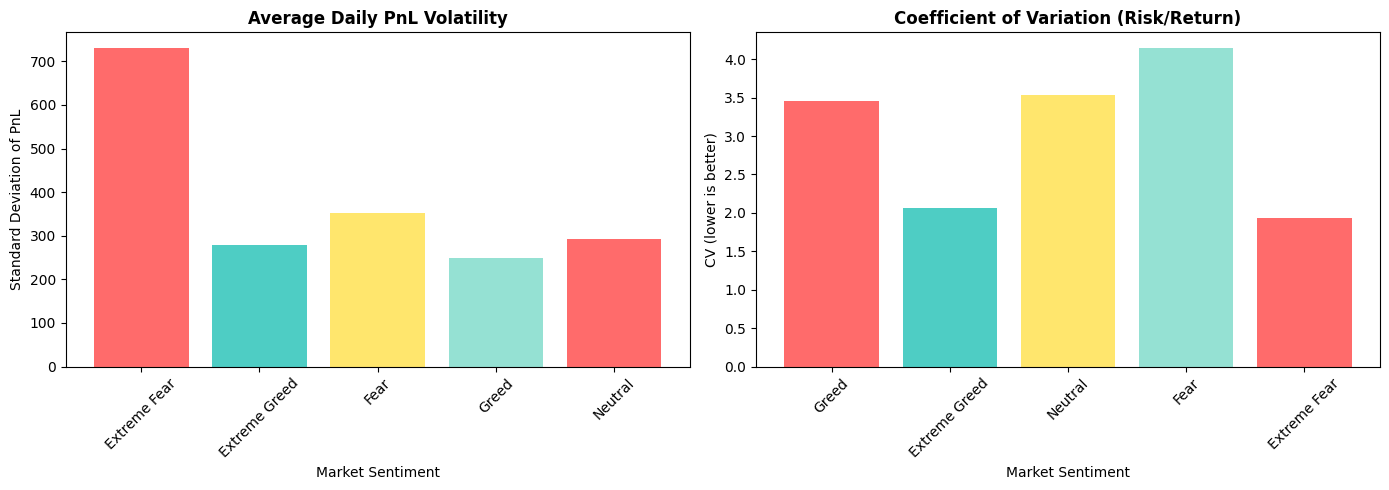

✓ Chart saved: outputs/08_volatility_analysis.png


In [7]:
print("\n" + "=" * 80)
print("ANALYSIS 2: PNL VOLATILITY BY SENTIMENT")
print("=" * 80)

volatility_metrics = merged_df.groupby('classification').agg({
    'std_pnl': 'mean',
    'avg_pnl': ['mean', 'std']
}).round(2)

print(volatility_metrics)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Average volatility
std_pnl = merged_df.groupby('classification')['std_pnl'].mean()
axes[0].bar(std_pnl.index, std_pnl.values,
            color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[0].set_title('Average Daily PnL Volatility', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Standard Deviation of PnL')
axes[0].set_xlabel('Market Sentiment')
axes[0].tick_params(axis='x', rotation=45)

# Coefficient of Variation (Risk per unit return)
cv_by_sentiment = {}
for sentiment in merged_df['classification'].unique():
    subset = merged_df[merged_df['classification'] == sentiment]
    mean_pnl = subset['avg_pnl'].mean()
    std_pnl = subset['avg_pnl'].std()
    cv = abs(std_pnl / mean_pnl) if mean_pnl != 0 else 0
    cv_by_sentiment[sentiment] = cv

axes[1].bar(cv_by_sentiment.keys(), cv_by_sentiment.values(),
            color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
axes[1].set_title('Coefficient of Variation (Risk/Return)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('CV (lower is better)')
axes[1].set_xlabel('Market Sentiment')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/08_volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved: outputs/08_volatility_analysis.png")

# ANALYSIS 3: STATISTICAL SIGNIFICANCE TESTS

In [11]:
print("\n" + "=" * 80)
print("ANALYSIS 3: STATISTICAL SIGNIFICANCE TESTS")
print("=" * 80)

# Test if PnL differs significantly across sentiments
sentiments = merged_df['classification'].unique()
pnl_by_sentiment = [merged_df[merged_df['classification'] == s]['avg_pnl'].values
                    for s in sentiments]

# ANOVA test
f_stat, p_value = stats.f_oneway(*pnl_by_sentiment)
print(f"\nANOVA Test (PnL across sentiments):")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  P-value: {p_value:.6f}")
if p_value < 0.05:
    print("  ✓ Significant difference detected (p < 0.05)")
else:
    print("  ✗ No significant difference (p >= 0.05)")

# Pairwise t-tests
print("\nPairwise T-Tests:")
from itertools import combinations
for s1, s2 in combinations(sentiments, 2):
    group1 = merged_df[merged_df['classification'] == s1]['avg_pnl']
    group2 = merged_df[merged_df['classification'] == s2]['avg_pnl']
    t_stat, p_val = stats.ttest_ind(group1, group2)
    print(f"  {s1} vs {s2}: t={t_stat:.4f}, p={p_val:.6f}")


ANALYSIS 3: STATISTICAL SIGNIFICANCE TESTS

ANOVA Test (PnL across sentiments):
  F-statistic: 0.7443
  P-value: 0.562150
  ✗ No significant difference (p >= 0.05)

Pairwise T-Tests:
  Greed vs Extreme Greed: t=-1.1321, p=0.258466
  Greed vs Neutral: t=-1.0517, p=0.293914
  Greed vs Fear: t=0.4771, p=0.633647
  Greed vs Extreme Fear: t=0.0266, p=0.978841
  Extreme Greed vs Neutral: t=-0.2779, p=0.781414
  Extreme Greed vs Fear: t=1.4731, p=0.142275
  Extreme Greed vs Extreme Fear: t=0.5683, p=0.570870
  Neutral vs Fear: t=1.1452, p=0.253891
  Neutral vs Extreme Fear: t=0.4150, p=0.679241
  Fear vs Extreme Fear: t=-0.2012, p=0.840967


# ANALYSIS 4: MOMENTUM & TREND ANALYSIS


ANALYSIS 4: MOMENTUM & TREND ANALYSIS


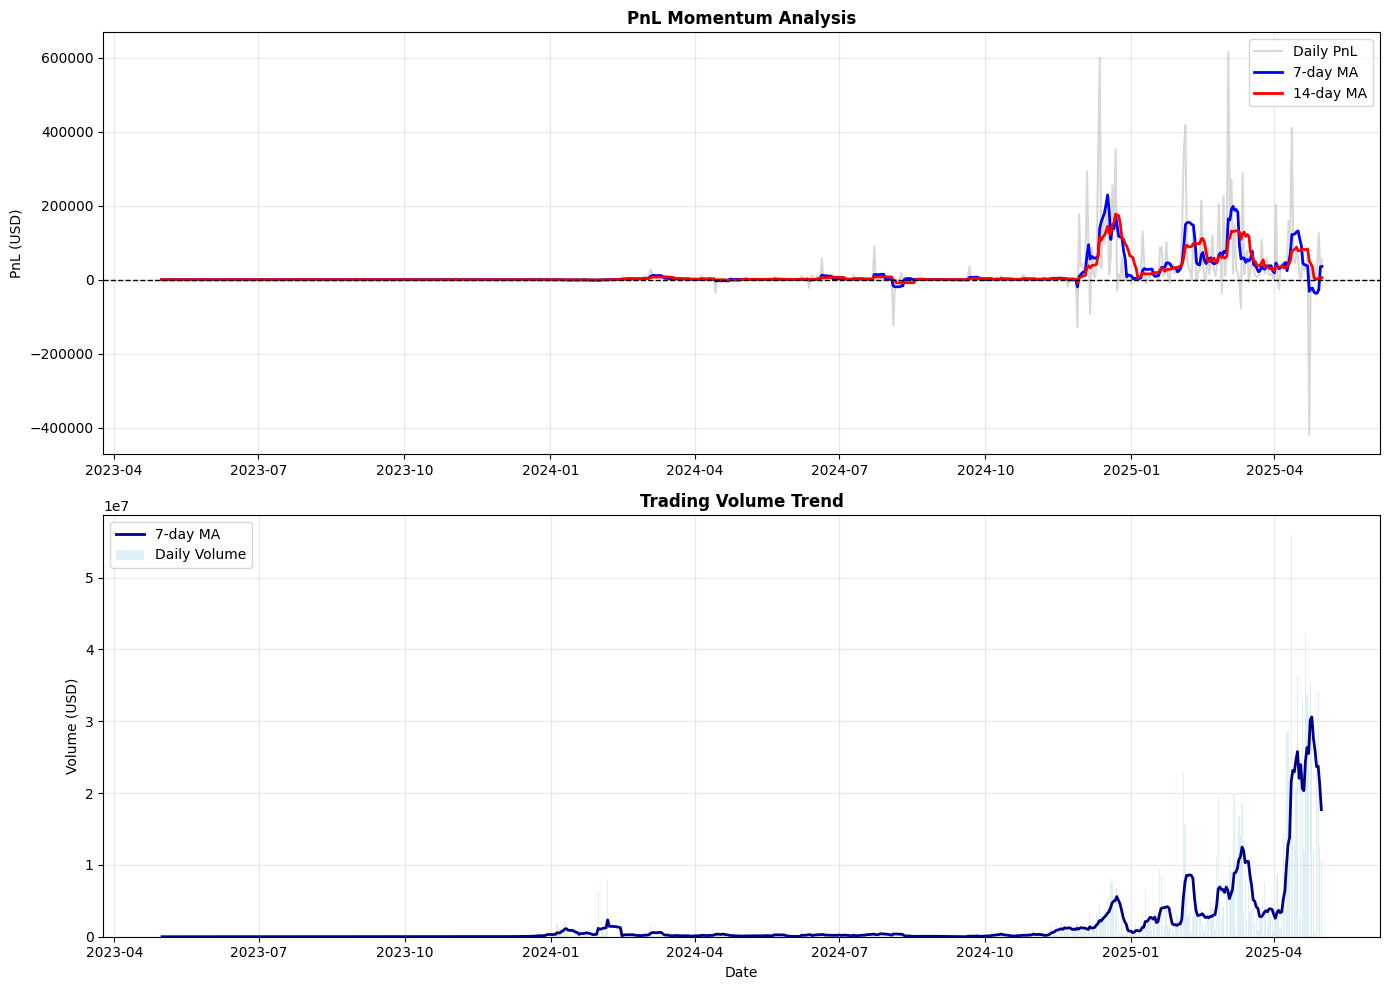

✓ Chart saved: outputs/09_momentum_analysis.png


In [8]:
print("\n" + "=" * 80)
print("ANALYSIS 4: MOMENTUM & TREND ANALYSIS")
print("=" * 80)

# Calculate rolling averages
merged_df = merged_df.sort_values('date')
merged_df['pnl_ma7'] = merged_df['total_pnl'].rolling(window=7, min_periods=1).mean()
merged_df['pnl_ma14'] = merged_df['total_pnl'].rolling(window=14, min_periods=1).mean()
merged_df['volume_ma7'] = merged_df['total_volume'].rolling(window=7, min_periods=1).mean()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# PnL Momentum
axes[0].plot(merged_df['date'], merged_df['total_pnl'],
             alpha=0.3, label='Daily PnL', color='gray')
axes[0].plot(merged_df['date'], merged_df['pnl_ma7'],
             label='7-day MA', linewidth=2, color='blue')
axes[0].plot(merged_df['date'], merged_df['pnl_ma14'],
             label='14-day MA', linewidth=2, color='red')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].set_title('PnL Momentum Analysis', fontsize=12, fontweight='bold')
axes[0].set_ylabel('PnL (USD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volume Trend
axes[1].bar(merged_df['date'], merged_df['total_volume'],
            alpha=0.4, label='Daily Volume', color='lightblue')
axes[1].plot(merged_df['date'], merged_df['volume_ma7'],
             label='7-day MA', linewidth=2, color='darkblue')
axes[1].set_title('Trading Volume Trend', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Volume (USD)')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/09_momentum_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved: outputs/09_momentum_analysis.png")

# ANALYSIS 5: SENTIMENT TRANSITION EFFECTS


ANALYSIS 5: SENTIMENT TRANSITION EFFECTS
Found 131 sentiment transition days

Average metrics on sentiment transition days:
                avg_pnl  total_volume  profitable_ratio
classification                                         
Extreme Fear      15.72    6780010.56              0.24
Extreme Greed     60.42     747202.13              0.49
Fear              41.21    6311759.43              0.30
Greed             27.39    2598566.14              0.36
Neutral           40.88    3877216.49              0.32


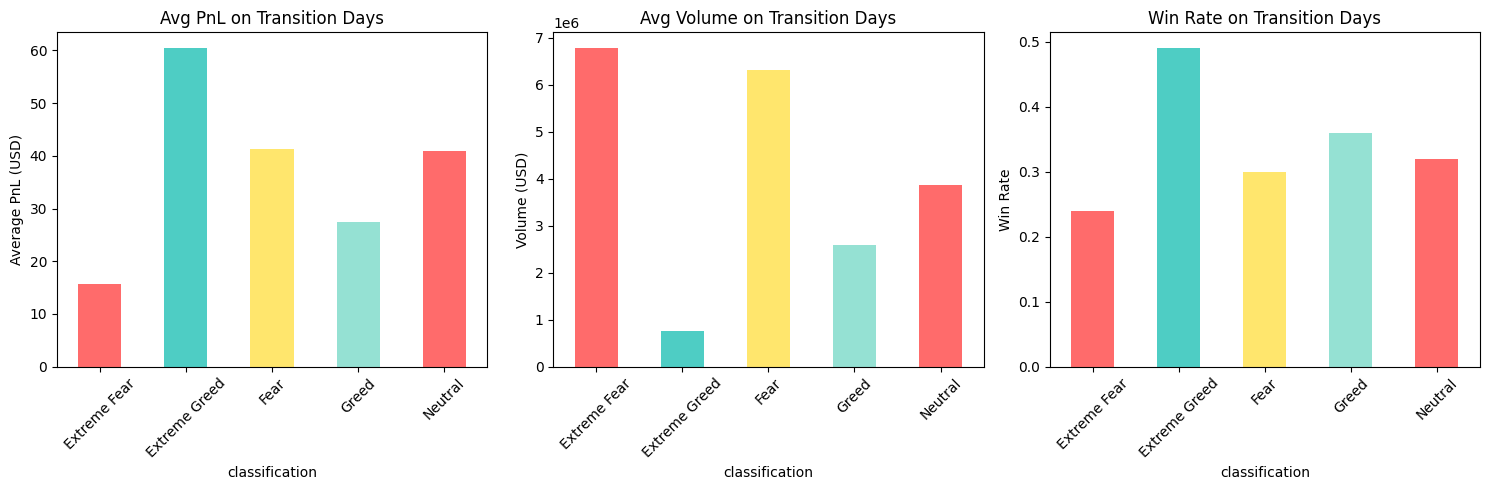

✓ Chart saved: outputs/10_sentiment_transitions.png


In [9]:
print("\n" + "=" * 80)
print("ANALYSIS 5: SENTIMENT TRANSITION EFFECTS")
print("=" * 80)

# Detect sentiment changes
merged_df['prev_classification'] = merged_df['classification'].shift(1)
merged_df['sentiment_changed'] = merged_df['classification'] != merged_df['prev_classification']

# Performance before vs after sentiment change
transition_df = merged_df[merged_df['sentiment_changed'] == True].copy()
print(f"Found {len(transition_df)} sentiment transition days")

if len(transition_df) > 0:
    # Analyze PnL around transitions
    transition_analysis = transition_df.groupby('classification').agg({
        'avg_pnl': 'mean',
        'total_volume': 'mean',
        'profitable_ratio': 'mean'
    }).round(2)

    print("\nAverage metrics on sentiment transition days:")
    print(transition_analysis)

    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    transition_analysis['avg_pnl'].plot(kind='bar', ax=axes[0],
                                         color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
    axes[0].set_title('Avg PnL on Transition Days')
    axes[0].set_ylabel('Average PnL (USD)')
    axes[0].tick_params(axis='x', rotation=45)

    transition_analysis['total_volume'].plot(kind='bar', ax=axes[1],
                                              color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
    axes[1].set_title('Avg Volume on Transition Days')
    axes[1].set_ylabel('Volume (USD)')
    axes[1].tick_params(axis='x', rotation=45)

    transition_analysis['profitable_ratio'].plot(kind='bar', ax=axes[2],
                                                  color=['#ff6b6b', '#4ecdc4', '#ffe66d', '#95e1d3'])
    axes[2].set_title('Win Rate on Transition Days')
    axes[2].set_ylabel('Win Rate')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/10_sentiment_transitions.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Chart saved: outputs/10_sentiment_transitions.png")


# ANALYSIS 6: EXTREME SENTIMENT BEHAVIOR


ANALYSIS 6: EXTREME SENTIMENT BEHAVIOR
Extreme Fear days: 5
Extreme Greed days: 34
Neutral days: 104

Comparison:
          Extreme Fear       Neutral  Extreme Greed
Avg PnL   5.391027e+01  6.806100e+01   7.944485e+01
Win Rate  2.943461e-01  3.089196e-01   5.266069e-01
Volume    9.173218e+06  3.599174e+06   1.198180e+06


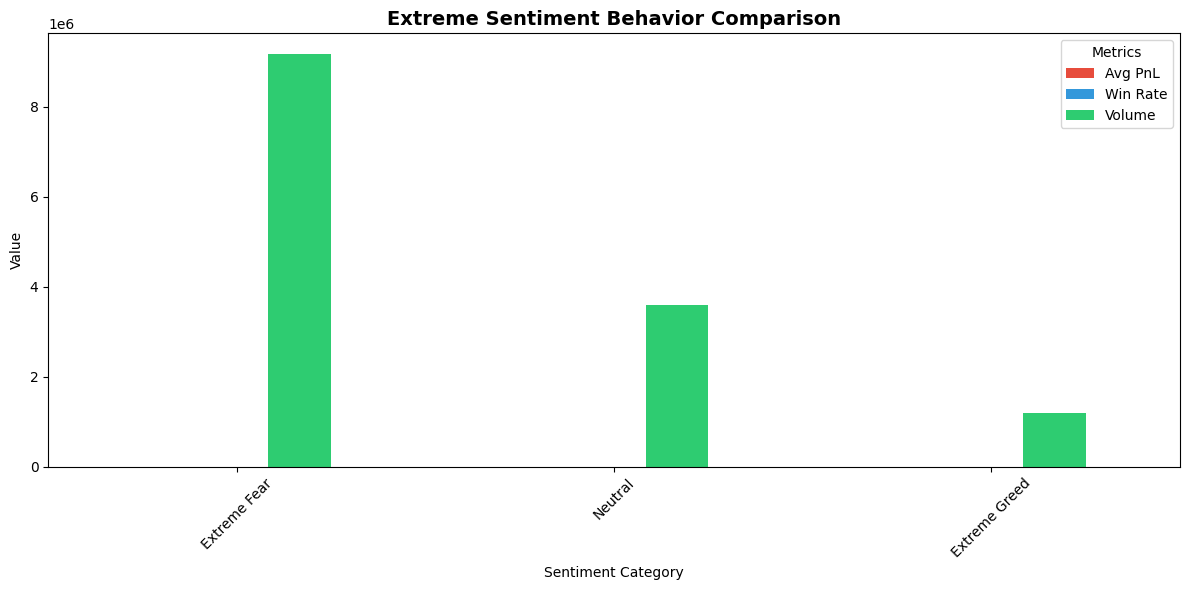

✓ Chart saved: outputs/11_extreme_sentiment.png


In [10]:
print("\n" + "=" * 80)
print("ANALYSIS 6: EXTREME SENTIMENT BEHAVIOR")
print("=" * 80)

# Define extreme sentiments
extreme_fear = merged_df[merged_df['value'] < 20]
extreme_greed = merged_df[merged_df['value'] > 80]
neutral = merged_df[(merged_df['value'] >= 40) & (merged_df['value'] <= 60)]

print(f"Extreme Fear days: {len(extreme_fear)}")
print(f"Extreme Greed days: {len(extreme_greed)}")
print(f"Neutral days: {len(neutral)}")

comparison = pd.DataFrame({
    'Extreme Fear': [extreme_fear['avg_pnl'].mean(),
                     extreme_fear['profitable_ratio'].mean(),
                     extreme_fear['total_volume'].mean()],
    'Neutral': [neutral['avg_pnl'].mean(),
                neutral['profitable_ratio'].mean(),
                neutral['total_volume'].mean()],
    'Extreme Greed': [extreme_greed['avg_pnl'].mean(),
                      extreme_greed['profitable_ratio'].mean(),
                      extreme_greed['total_volume'].mean()]
}, index=['Avg PnL', 'Win Rate', 'Volume'])

print("\nComparison:")
print(comparison)

# Visualize
comparison.T.plot(kind='bar', figsize=(12, 6),
                  color=['#e74c3c', '#3498db', '#2ecc71'])
plt.title('Extreme Sentiment Behavior Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Value')
plt.xlabel('Sentiment Category')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Assignments/DS Assignment Primetrade.ai/outputs/11_extreme_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Chart saved: outputs/11_extreme_sentiment.png")